# PyTorch로 시작하는 딥러닝 입문

## 5장 : Artificial Neural Networks

https://wikidocs.net/60021

## 5.1 Actication Function

비선형 활성화함수는 입력을 받아 수학적 변환을 수행하고 출력을 생성해내는 함수입니다. 앞서 배운 시그모이드 함수나 소프트맥스 함수가 대표적인 Activation Function이며 이번 장에서는 다양한 Activation Function을 그래프와 함께 이해해 보겠습니다.

### 1) Nonlinear Function

활성화 함수의 특징은 비선형이라는 점입니다. 인공 신경망의 능력을 높이기 위해서는 은닉층을 계속 추가하여야 하는데 선형 함수를 사용하게 되면 은닉층을 쌓을 수 없습니다. 선형 함수를 활성화함수로 사용하게 되면 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이를 줄 수 없게 됩니다.

### 2) Sigmoid Function & Gradient Vanishing

시그모이드 함수를 사용한 어떠한 인공신경망이 있다고 가정해보겠습니다.
![](https://wikidocs.net/images/page/60683/simple-neural-network.png)

위의 인공 신경망은 입력에 대해 순전파 연산을 하고, 순전파 연산을 통해 나온 예측값과 실제값의 오차를 Loss Function으로 계산하며, 이 손실을 미분을 통해 Gradient를 구하고 이를 통해 Back Propagation을 수행합니다. 그리고 시그모이드함수의 문제점은 미분을 통해 기울기를 구할 때 발생합니다.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

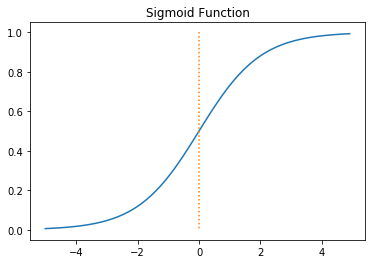

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위의 그래프는 시그모이드 함수의 그래프를 보여줍니다. 기울기가 완만해지는 구간을 주황색, 그렇지 않은 구간을 초록색으로 칠해보겠습니다.

![](https://wikidocs.net/images/page/60683/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C%ED%95%A8%EC%88%982.PNG)

주황색 부분은 기울기를 계산하면 0에 가까운 아주 작은 값이 나오게 됩니다. 그러나 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 된다면 앞단에는 기울기가 잘 전달되지 않게 되며 이러한 현상을 **Gradient Vanishing**이라고 합니다.

시그모이드 함수를 사용하는 은닉층의 개수가 다수가 될 경우에는 0에 가까운 기울기가 계속 곱해지게 된다면 앞단에서는 거의 기울기를 전파받을 수 없게 됩니다. 다시 말해 parameter W가 업데이트 되지 않아 학습이 진행되지 않습니다.

![](https://wikidocs.net/images/page/60683/%EA%B8%B0%EC%9A%B8%EA%B8%B0_%EC%86%8C%EC%8B%A4.png)

이에 따라 시그모이드 함수를 은닉층에서 사용하는 것은 지양됩니다.

### 3) Hyperbolic Tangent Function

하이퍼볼릭탄젠트함수(tanh)는 입력값을 -1과 1 사이의 값으로 변환합니다.

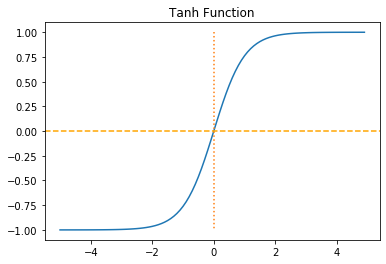

In [3]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

하이퍼볼릭탄젠트 함수도 -1과 1에 가까운 값을 출력할 때 시그모이드 함수와 같은 문제가 발생하나, 시그모이드 함수와 달리 0을 중심으로 하고 있기에 반환값의 변화폭이 더 커서 기울기 소실 증상이 적은 편입니다.

### 4) ReLu Function

인공신경망에서 가장 인기있는 Activation Function입니다. 수식은 다음과 같습니다.

$ f(x) = max(0, x) $

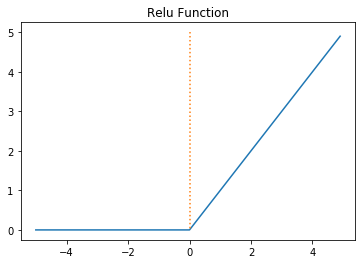

In [4]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

ReLu 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환합니다. 특정 양수값에 수렴하지 않으므로 깊은 신경망에서 시그모이드 함수보다 더 잘 작동하며, 단순 임계값이므로 연산 속도도 빠릅니다. 그러나 입력값이 음수면 기울기도 0이 되므로 그런 경우 뉴런을 다시 회생하는 것은 매우 어렵습니다.

### 6) SoftMax Function

Softmax 함수는 시그모이드 함수처럼 출력층의 뉴런에서 주로 사용되는데, 시그모이드 함수가 두가지 선택지 중 하나를 고르는 Binary Classification에 사용한다면 Softmax 함수는 MultiClass Classification에 주로 사용됩니다.

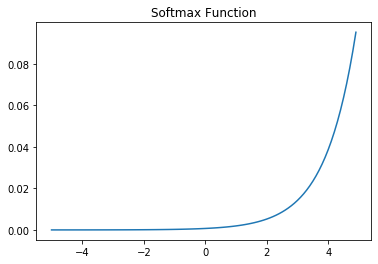

In [5]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

#### 시그모이드는 문제가 많기 때문에 ReLu를 먼저 시도해보고 그 다음으로 ReLu의 변형 함수를 시도할 것을 권장합니다!

## 5.2 Gradient Vanishing and Exploding

깊이가 깊은 인공 신경망을 학습하다보면 역전파 과정에서 입력층으로 갈수록 기울기가 점차적으로 작아지는 현상이 발생할 수 있습니다. 입력층에 가까운 층들에서 가중치들이 업데이트가 제대로 되지 않으면 결국 최적의 모델을 찾을 수 없으며 이를 **Gradient Vanishing**이라고 합니다.

반대의 경우도 있습니다. 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산되기도 합니다. 이를 **Gradient Exploding**이라고 하며, RNN에서 발생할 수 있습니다.

이번 장에서는 기울기 소실 또는 기울기 폭주를 막을 수 있는 방법에 대해 학습하고자 합니다.

### 1) ReLu와 ReLu의 변형들
- 은닉층에서는 시그모이드 함수를 사용하지 말 것
- Leaky ReLu를 사용하면 모든 입력에 대해 기울기가 0에 수렴하지 않아 Gradient 관련 문제를 해결할 수 있습니다.

### 2) Weight Initialization
- 같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌느냐에 따라 모델의 훈련 결과가 달라지기도 합니다. 가중치 초기화만 적절하게 해줘도 Gradient Vanishing 문제를 해결할 수 있습니다.

- Xavier Initialization
http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf

- He Initialization
https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf

### 3) Batch Normalization
- Internal Covariate Shift
**내부 공변량 변화**는 학습 과정에서 층 별로 입력 데이터 분포가 달라지는 현상을 말합니다. 이전 층들의 학습에 의해 이전 층의 가중치 값이 바뀌게 되면, 현재 층에 전달되는 입력 데이터의 분포가 현재 층이 학습했던 시점의 분포와 차이가 발생합니다.
- Batch Normalization
**배치 정규화**는 표현 그대로 한 번에 들어오는 배치 단위로 정규화하는 것을 말합니다. 배치 정규화는 각 층에서 활성화 함수를 통과하기 전에 수행되며, 입력에 대해 평균을 0으로 만들고 정규화된 데이터에 대해 스케일과 시프트를 수행하는 방식으로 진행됩니다.


가중치 초기화 참고 자료 :
http://nlp.jbnu.ac.kr/AI2019/slides/ch05-1.pdf
https://reniew.github.io/13/
https://calcifer1009-dev.tistory.com/11

배치 정규화 인터넷 강의(한국어 자막) :
https://www.youtube.com/watch?v=tNIpEZLv_eg
https://www.youtube.com/watch?v=em6dfRxYkYU
https://www.youtube.com/watch?v=nUUqwaxLnWs

배치 정규화 참고자료 :
https://light-tree.tistory.com/139
https://sacko.tistory.com/44?category=632408
http://funmv2013.blogspot.com/2016/09/batch-normalization.html
https://excelsior-cjh.tistory.com/178
https://www.youtube.com/watch?v=HCEr5f-LfVE&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=17

## 5.3 Overfitting

### 1) 데이터의 양 늘리기

모델은 데이터의 양이 적을 경우, 해당 데이터의 특정 패턴이나 노이즈까지 쉽게 암기하기 되므로 과적합 현상이 발생할 확률이 늘어납니다. 그렇기 때문에 데이터의 양을 늘릴 수록 모델은 데이터의 일반적인 패턴을 학습하여 과적합을 방지할 수 있습니다.

만약, 데이터의 양이 적을 경우에는 의도적으로 기존의 데이터를 조금씩 변형하고 추가하여 데이터의 양을 늘리기도 하는데 이를 데이터 증식 또는 증강(Data Augmentation)이라고 합니다. 이미지의 경우에는 데이터 증식이 많이 사용되는데 이미지를 돌리거나 노이즈를 추가하고, 일부분을 수정하는 등으로 데이터를 증식시킵니다.

### 2) 모델의 복잡도 줄이기
인공 신경망의 복잡도는 은닉층(hidden layer)의 수나 매개변수의 수 등으로 결정됩니다. 과적합 현상이 포착되었을 때, 인공 신경망 모델에 대해서 할 수 있는 한 가지 조치는 인공 신경망의 복잡도를 줄이는 것 입니다. 예를 들어보겠습니다.

다음과 같이 클래스를 사용하여 구현한 인공 신경망이 있다고 가정해봅시다.

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

C:\Users\82104\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [7]:
class Architecture1(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Architecture1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nnReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

위 인공 신경망은 3개의 선형 레이어(Linear)를 가지고 있습니다. 위 인공 신경망이 입력 데이터에 과적합 현상을 보인다면, 다음과 같이 인공 신경망의 복잡도를 줄일 수 있습니다.

In [8]:
class Architecture1(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Architecture1, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

### 3) Regularization

복잡한 모델이 간단한 모델보다 과적합될 가능성이 높습니다. 그리고 간단한 모델은 적은 수의 매개변수를 가진 모델을 말합니다. 복잡한 모델을 좀 더 간단하게 하는 방법으로 가중치 규제(Regularizaiton)가 있습니다.

L1 규제 : 가중치 w들의 절대값 합계를 비용 함수에 추가합니다. L1 노름이라고도 합니다.
L2 규제 : 모든 가중치 w들의 제곱합을 비용 함수에 추가합니다. L2 노름이라고도 합니다.

### 4) Dropout

드롭아웃은 학습 과정에서 신경망의 일부를 사용하지 않는 방법입니다.

![](https://wikidocs.net/images/page/60751/%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83.PNG)

드롭아웃은 신경망 학습 시에만 사용하고, 예측 시에는 사용하지 않는 것이 일반적입니다. 학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지해주고, 매번 랜덤 선택으로 뉴런들을 사용하지 않으므로 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합을 방지합니다.